In [37]:
import openpyxl
import numpy as np
import operator
import matplotlib.pyplot as plt

In [38]:
beans = []

读取数据

In [39]:
wb = openpyxl.load_workbook('Dry_Bean_Dataset.xlsx')
#用active来获取当前工作表
sheet = wb.active
# 对行进行遍历,输出A1,B1,C1
for row in sheet.rows:
    bean = []
    length = len(row)
    for cell in row:
        bean.append(cell.value)
    beans.append(bean)


label_map = {
    'SEKER': [1, 0, 0, 0, 0, 0, 0],
    'BARBUNYA': [0, 1, 0, 0, 0, 0, 0],
    'BOMBAY': [0, 0, 1, 0, 0, 0, 0],
    'CALI': [0, 0, 0, 1, 0, 0, 0],
    'HOROZ': [0, 0, 0, 0, 1, 0, 0],
    'SIRA': [0, 0, 0, 0, 0, 1, 0],
    'DERMASON': [0, 0, 0, 0, 0, 0, 1]
}

In [40]:
X = np.array([[float(x) for x in s[:-1]] for s in beans], np.float32)
Y = np.array([label_map[s[-1]] for s in beans], np.float32)

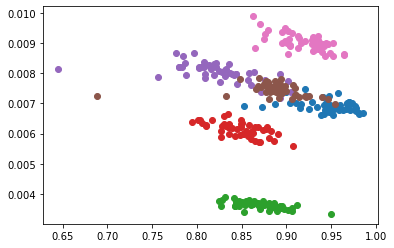

In [41]:
d0 = 10
d1 = 12
plt.scatter(X[:50, d0], X[:50, d1])
plt.scatter(X[2030:1080, d0], X[2030:1080, d1])
plt.scatter(X[3400:3450, d0], X[3400:3450, d1])
plt.scatter(X[3880:3930, d0], X[3880:3930, d1])
plt.scatter(X[5510:5560, d0], X[5510:5560, d1])
plt.scatter(X[7440:7490, d0], X[7440:7490, d1])
plt.scatter(X[10070:10120, d0], X[10070:10120, d1])


划分训练集

In [42]:
train_idx = np.random.choice(13611, 10888, replace=False)
test_idx = np.array(list(set(range(13611)) - set(train_idx)))
X_train, Y_train = X[train_idx], Y[train_idx]
X_test, Y_test = X[test_idx], Y[test_idx]

分类

In [43]:
from Knn import KNNClassifier
from Bayes import NBClassifier
from PCA import PCA
from numpy import interp
from sklearn.metrics import roc_curve, auc

In [44]:
'''NB = NBClassifier()
NB.fit(X_train, Y_train)
out = NB.predict(X_test)
print((out.argmax(1)==Y_test.argmax(1)).mean())'''
Knn = KNNClassifier()
Knn.fit(X_train, Y_train)
out = Knn.predict(X_test, 5)
print((out.argmax(1)==Y_test.argmax(1)).mean())

0.9133308850532501


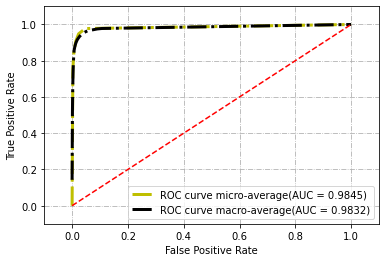

In [45]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], thresholds = roc_curve(Y_test[:, i],out[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#micro
fpr["micro"], tpr["micro"], thresholds = roc_curve(Y_test.ravel(),out.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#macro
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# 求平均计算ROC包围的面积AUC
mean_tpr /= 7
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


plt.figure()
plt.plot(fpr["micro"], tpr["micro"],'k-',color='y',
         label='ROC curve micro-average(AUC = {0:0.4f})'
               ''.format(roc_auc["micro"]),
          linestyle='-.', linewidth=3)
          
plt.plot(fpr["macro"], tpr["macro"],'k-',color='k',
         label='ROC curve macro-average(AUC = {0:0.4f})'
               ''.format(roc_auc["macro"]),
          linestyle='-.', linewidth=3)

plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(linestyle='-.')  
plt.grid(True)
plt.show()

In [46]:
pca = PCA()
X_train = pca.fit_and_transform(X_train, 4)
X_test = pca.transform(X_test)

In [47]:
'''NB = NBClassifier()
NB.fit(X_train, Y_train)
out = NB.predict(X_test)
print((out.argmax(1)==Y_test.argmax(1)).mean())'''

Knn = KNNClassifier()
Knn.fit(X_train, Y_train)
out = Knn.predict(X_test, 5)
print((out.argmax(1)==Y_test.argmax(1)).mean())

0.8802791039294895


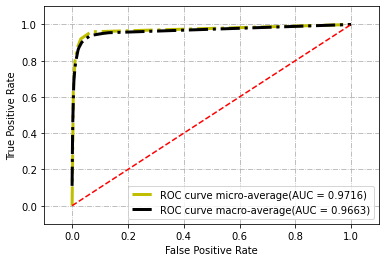

In [48]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], thresholds = roc_curve(Y_test[:, i],out[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

#micro
fpr["micro"], tpr["micro"], thresholds = roc_curve(Y_test.ravel(),out.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#macro
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(7)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(7):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])
# 求平均计算ROC包围的面积AUC
mean_tpr /= 7
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


plt.figure()
plt.plot(fpr["micro"], tpr["micro"],'k-',color='y',
         label='ROC curve micro-average(AUC = {0:0.4f})'
               ''.format(roc_auc["micro"]),
          linestyle='-.', linewidth=3)
          
plt.plot(fpr["macro"], tpr["macro"],'k-',color='k',
         label='ROC curve macro-average(AUC = {0:0.4f})'
               ''.format(roc_auc["macro"]),
          linestyle='-.', linewidth=3)

plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc="lower right")
plt.grid(linestyle='-.')  
plt.grid(True)
plt.show()